In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams

In [2]:
train_df, val_df = pd.read_csv('../data/csv/train.csv'), pd.read_csv('../data/csv/val.csv')
train_df['text'], val_df['text'] = train_df['text'].str.lower(), val_df['text'].str.lower()
violated_df = train_df[train_df['labels'] == 1]
non_violated_df = train_df[train_df['labels'] == 0]

In [3]:
train_df['text'].size

7100

## Plots of the characters' count

<Axes: title={'center': 'Train Data'}, xlabel='Count of characters', ylabel='Number of texts'>

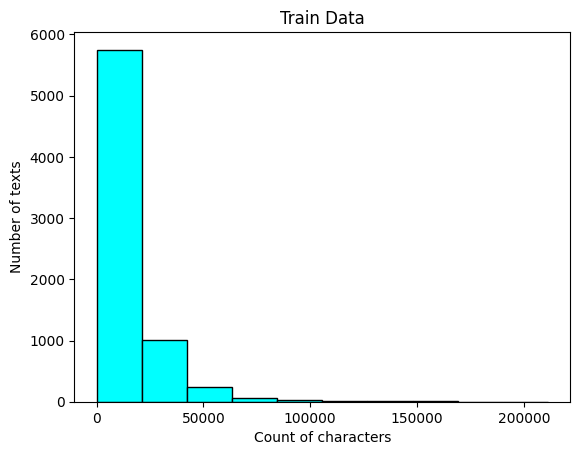

In [4]:
train_df['text'].str.len().plot(kind='hist', title='Train Data', xlabel='Count of characters', ylabel='Number of texts', color='cyan', edgecolor='black')

<Axes: title={'center': 'VIOLATED Class'}, xlabel='Count of characters', ylabel='Number of texts'>

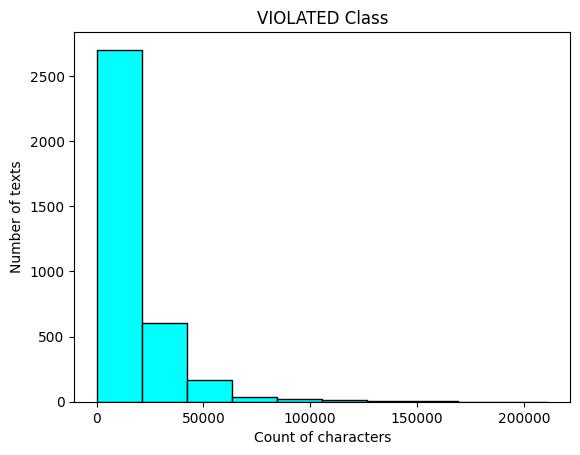

In [5]:
violated_df['text'].str.len().plot(kind='hist', xlabel='Count of characters', ylabel='Number of texts', color='cyan', edgecolor='black', title='VIOLATED Class')

<Axes: title={'center': 'NON_VIOLATED Class'}, xlabel='Number of texts', ylabel='Count of characters'>

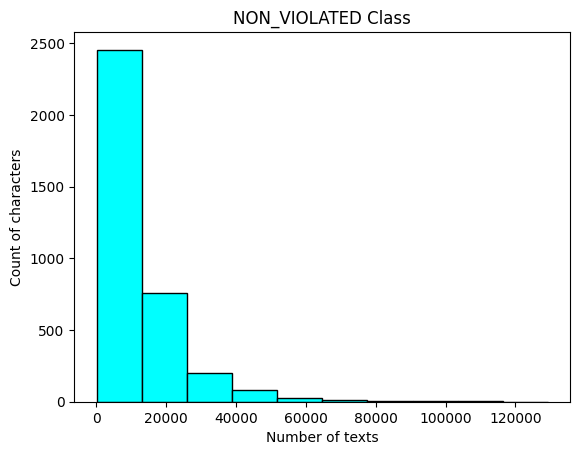

In [6]:
non_violated_df['text'].str.len().plot(kind='hist', xlabel='Number of texts', ylabel='Count of characters', color='cyan', edgecolor='black', title='NON_VIOLATED Class')

## Plots of words' count

<Axes: title={'center': 'Train Data'}, xlabel='Count of words', ylabel='Number of texts'>

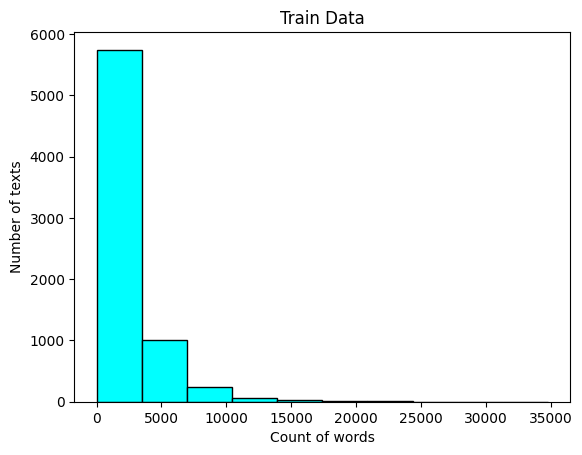

In [7]:
train_df['text'].str.split().apply(lambda x: len(x)).plot(kind='hist', xlabel='Count of words', ylabel='Number of texts',  color='cyan', edgecolor='black', title='Train Data')

<Axes: title={'center': 'VIOLATED Class'}, xlabel='Count of words', ylabel='Number of texts'>

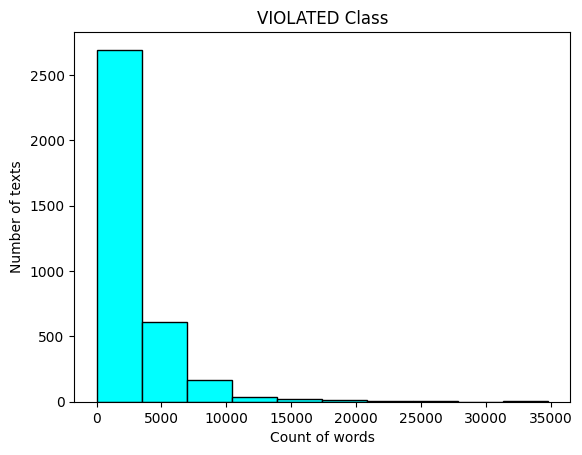

In [8]:
violated_df['text'].str.split().apply(lambda x: len(x)).plot(kind='hist', xlabel='Count of words', ylabel='Number of texts',  color='cyan', edgecolor='black', title='VIOLATED Class')

<Axes: title={'center': 'NON_VIOLATED Class'}, xlabel='Count of words', ylabel='Number of texts'>

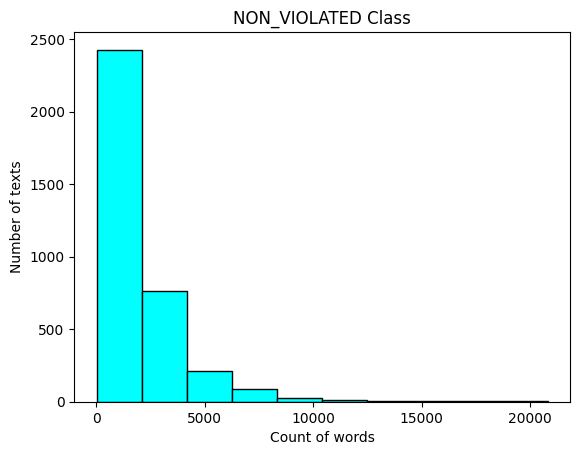

In [9]:
non_violated_df['text'].str.split().apply(lambda x: len(x)).plot(kind='hist', xlabel='Count of words', ylabel='Number of texts',  color='cyan', edgecolor='black', title='NON_VIOLATED Class')

## Average word length

<Axes: title={'center': 'Train Data'}, xlabel='Average word length', ylabel='Number of texts'>

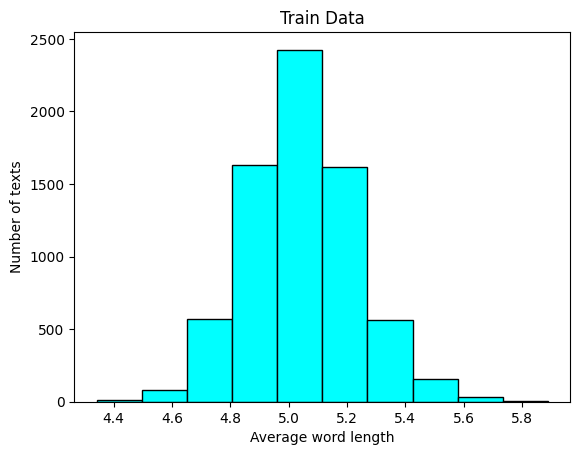

In [10]:
train_df['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).plot(kind='hist', title='Train Data', xlabel='Average word length', ylabel='Number of texts', color='cyan', edgecolor='black')

<Axes: title={'center': 'Violated Class'}, xlabel='Average word length', ylabel='Number of texts'>

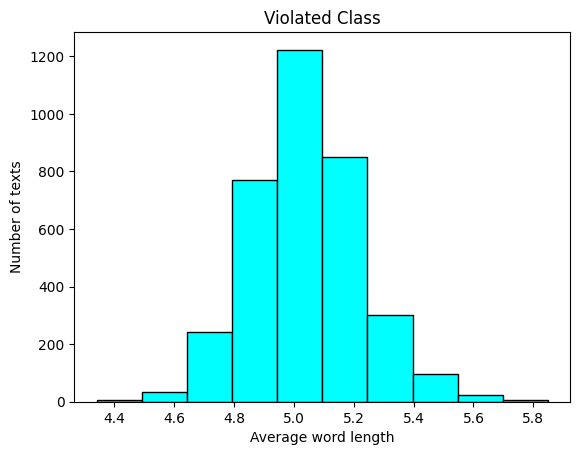

In [11]:
violated_df['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).plot(kind='hist', title='Violated Class', xlabel='Average word length', ylabel='Number of texts', color='cyan', edgecolor='black')

<Axes: title={'center': 'NON_VIOLATED Class'}, xlabel='Average word length', ylabel='Number of texts'>

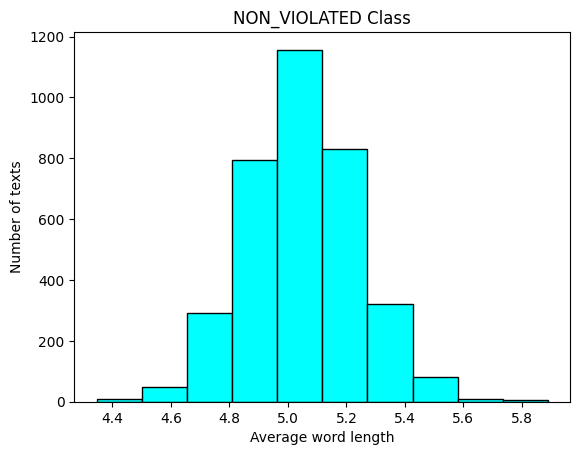

In [12]:
non_violated_df['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).plot(kind='hist', title='NON_VIOLATED Class', xlabel='Average word length', ylabel='Number of texts', color='cyan', edgecolor='black')

## Count of stopwords

In [45]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words.update({'shall', 'also', 'mr', 'mrs'})

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/leontioso/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
rows_of_wordlist = train_df['text'].str.split().values.tolist()
corpus = [word for row in rows_of_wordlist for word in row]

In [47]:
stopwords_corpus = defaultdict(int)
for word in corpus:
    if word in stop_words:
        stopwords_corpus[word] += 1

In [56]:
def plot_top_stopwords_barchart(text, *, title, figsize=(10, 6)):
    
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word.lower() in stop_words:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
    x,y=zip(*top)
    plt.figure(figsize=figsize)
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel('Stopwords')
    plt.ylabel('Frequency')
    plt.show()

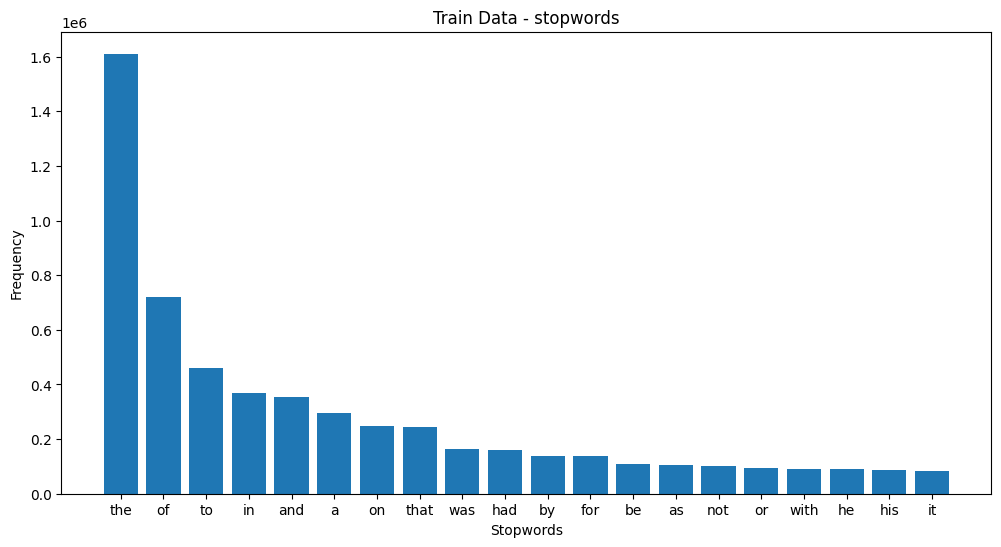

In [57]:
plot_top_stopwords_barchart(train_df['text'], title='Train Data - stopwords', figsize=(12,6))

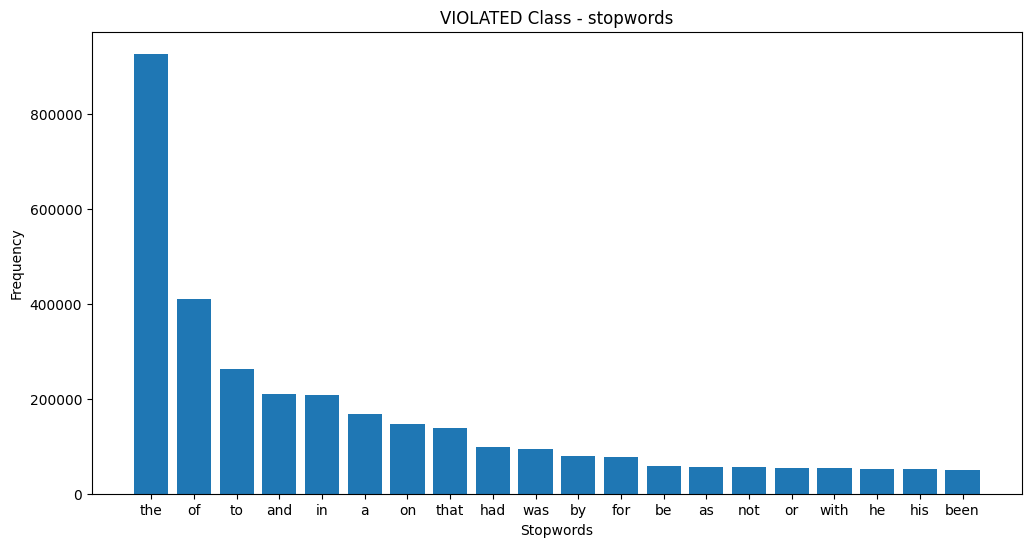

In [58]:
plot_top_stopwords_barchart(violated_df['text'], title='VIOLATED Class - stopwords', figsize=(12,6))

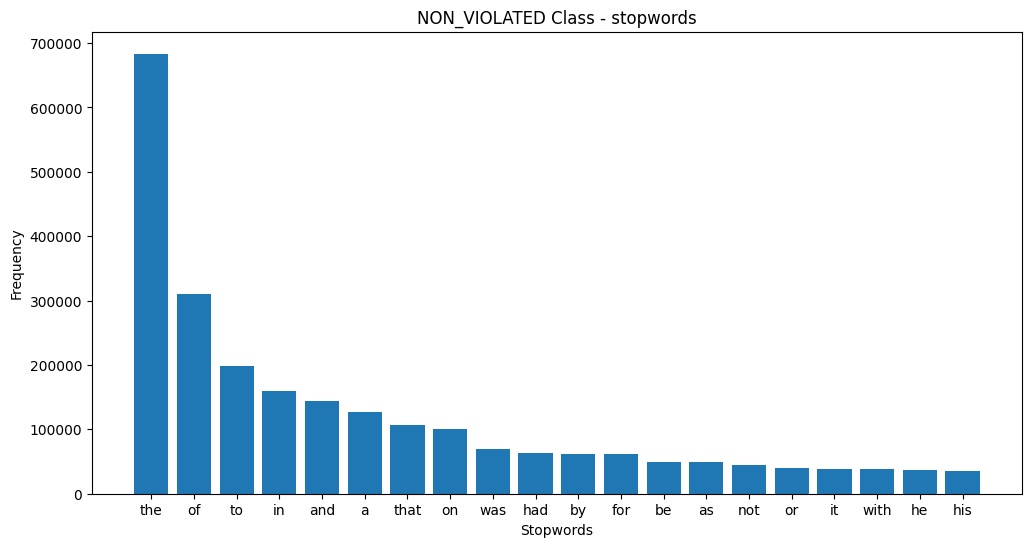

In [59]:
plot_top_stopwords_barchart(non_violated_df['text'], title='NON_VIOLATED Class - stopwords', figsize=(12,6))

In [64]:
def plot_top_lexwords_barchart(text, *, title, figsize=(8, 20)):
        
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word.lower() not in stop_words:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:50] 
    x,y=zip(*top)
    plt.figure(figsize=figsize)
    sns.barplot(x=y, y=x)
    plt.title(title)
    plt.xlabel('lexwords')
    plt.ylabel('Frequency')
    plt.show()

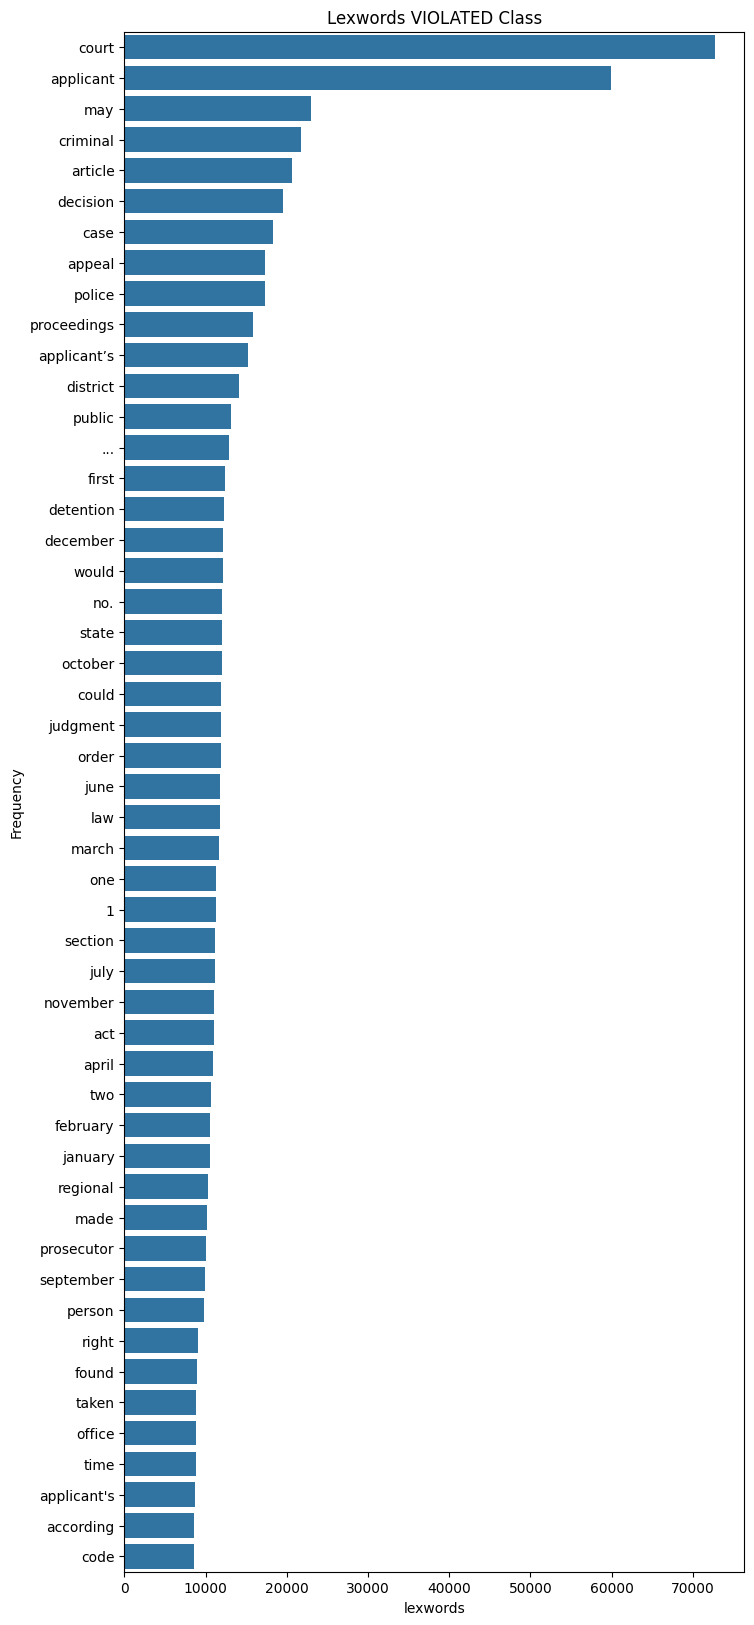

In [65]:
plot_top_lexwords_barchart(violated_df['text'], title='Lexwords VIOLATED Class')

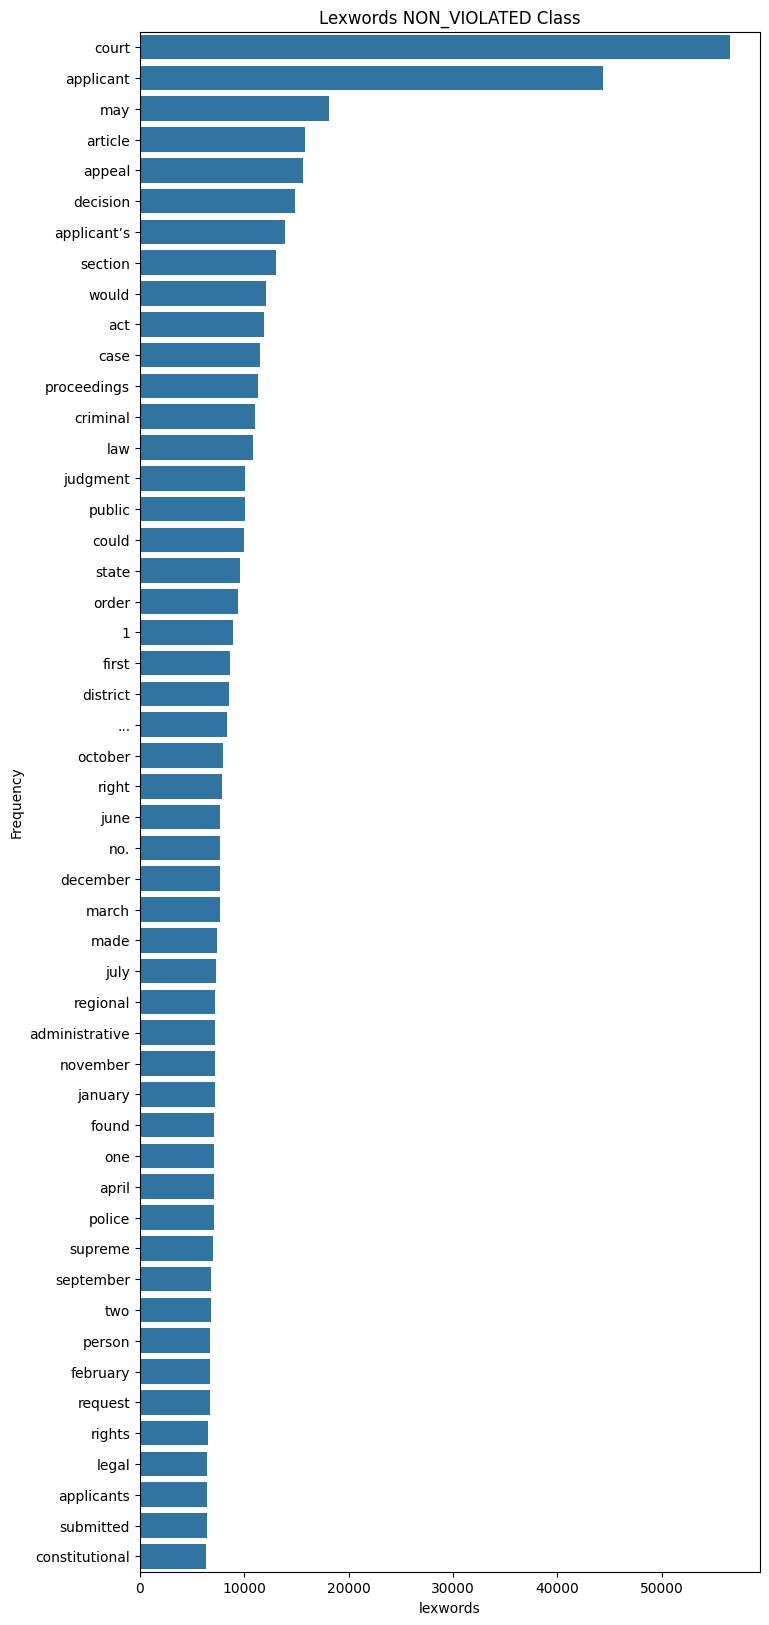

In [66]:
plot_top_lexwords_barchart(non_violated_df['text'], title='Lexwords NON_VIOLATED Class')

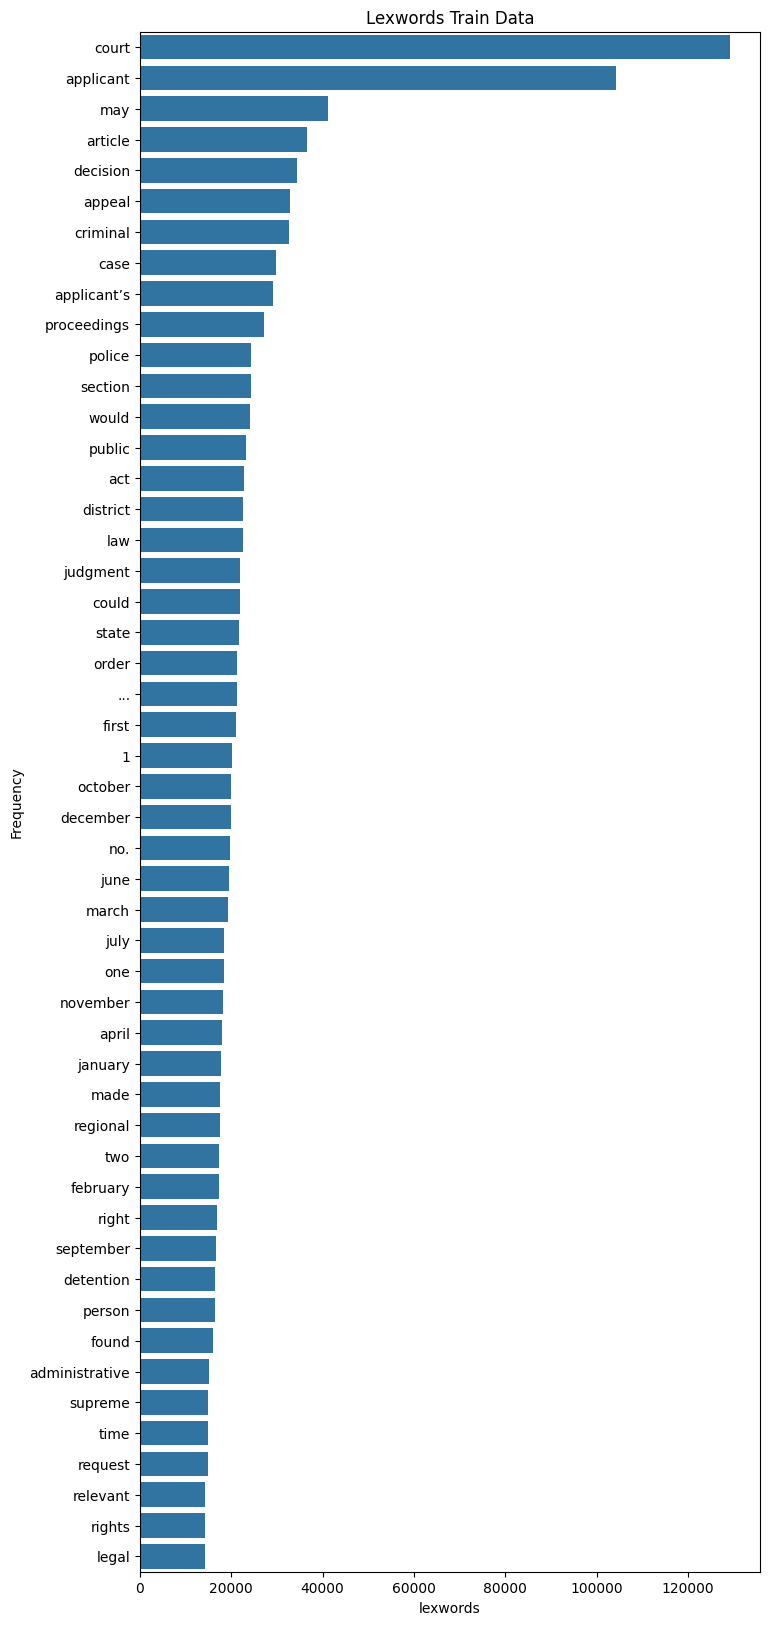

In [67]:
plot_top_lexwords_barchart(train_df['text'], title='Lexwords Train Data')